<a href="https://colab.research.google.com/github/BrendaWardhaugh/Project1/blob/working_file/starter_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 # Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import seaborn as sns

# Import API key
from config import geoapify_key

In [ ]:
!touch config.py

In [ ]:
# Read in csv files
nyc_airbnbs = pd.read_csv("AB_NYC_2019.csv")
nyc_airbnbs.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# check N/A values; drop N/A values if necessary 
nyc_airbnbs.isna()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [ ]:
nyc_airbnbs.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'Lat', 'Lon'],
      dtype='object')

<BarContainer object of 48895 artists>

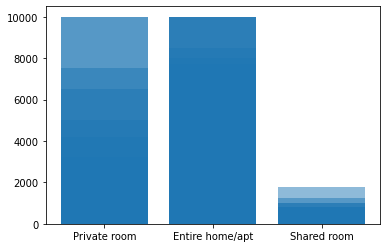

In [ ]:
x_value = "price"
y_value = "room_type"
plt.bar(nyc_airbnbs["room_type"], nyc_airbnbs["price"], alpha=.5, align="center")

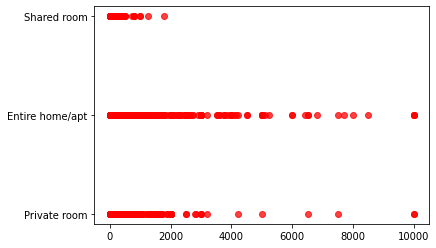

In [ ]:
plt.scatter(nyc_airbnbs["price"], nyc_airbnbs["room_type"], marker="o", facecolor="red", alpha=0.75)

In [ ]:
sns.scatterplot(data=nyc_airbnbs, x=nyc_airbnbs["longitude"], y=nyc_airbnbs["latitude"], hue = nyc_airbnbs["neighbourhood"])

0                Kensington
1                   Midtown
2                    Harlem
3              Clinton Hill
4               East Harlem
                ...        
48890    Bedford-Stuyvesant
48891              Bushwick
48892                Harlem
48893        Hell's Kitchen
48894        Hell's Kitchen
Name: neighbourhood, Length: 48895, dtype: object

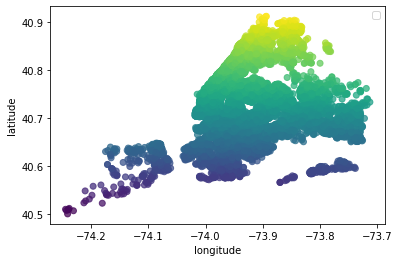

In [ ]:
 = plt.scatter(nyc_airbnbs["longitude"], nyc_airbnbs["latitude"], marker="o", color= "red", alpha=0.75)
plt.legend(neighbourhood)
neigh

In [ ]:
 # Define the API parameters
params = {
    "apiKey":geoapify_key,
    "format":"json"
}
# Set the base URL
base_url = "https://api.geoapify.com/v1/geocode/search"

In [ ]:
# Loop through the cities_pd DataFrame and search coordinates for each city
for index, row in nyc_airbnbs.iterrows():

    # Get the city's name & add ", Australia" to the string so geoapify finds the correct city
    neighbourhood = row["neighbourhood"] 

    # Add the current city to the parameters
    params["text"] = f"{neighbourhood}"

    # Make the API request
    response = requests.get(base_url, params=params)
    
    # Convert reponse to JSON
    response = response.json()

    # Extract latitude and longitude
    nyc_airbnbs.loc[index, "Lat"] = response["results"][0]["lat"]
    nyc_airbnbs.loc[index, "Lon"] = response["results"][0]["lon"]
    
    # Log the search results
    print(f"Coordinates for {neighbourhood} fetched...")

# Display sample data to confirm that the coordinates appear
nyc_airbnbs.head()

Coordinates for Kensington fetched...


KeyboardInterrupt: ignored